# Projeto 3
## Felipe Scandiuzzi M. Netto e Maria Clara L. Luques
## 2C - Ciência dos Dados

### Usando a variável 'expectativa de vida' como resposta, decidimos utilizar as variáveis '% de adultos entre 15 e 49 anos com HIV' e 'renda per capita', todas no ano de 2010. Tais variáveis foram escolhidas tendo como base o fato de que os aspectos que mais influenciam na expectatica de vida de um país estão relacionados à saúde e à renda da sua população, sendo esses pontos diretamente ligados à boa ou má qualidade de vida do país analisado. 

## Expectativa de vida vs. HIV (% da população entre 15 e 49 anos)
<img src="exhiv.png"/, width=840, height=720 align='center'>
## Expectativa de vida vs. PIB per capita
<img src="expercapita.png"/, width=840, height=700 align='center'>

In [1]:
'''Importando bibliotecas necessárias'''

%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\Semestre 2\Ciência dos Dados\CD\Projeto3


In [2]:
'''Verificando o diretório'''
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\Semestre 2\Ciência dos Dados\CD\Projeto3


In [44]:
'''Lendo tabelas do excel'''

dados1 = pd.read_excel("expectativa.xlsx",index_col=0)
dados2 = pd.read_excel('hiv.xlsx',index_col=0)
dados3 = pd.read_excel('per_capita.xlsx',index_col=0)

'''Separando apenas o ano de 2010 e transformando em DataFrame'''

expec = pd.DataFrame(dados1.ExpecV)
hiv = pd.DataFrame(dados2.HIVs)
lnhiv = pd.DataFrame(dados2.LNHIVs)
per_capita = pd.DataFrame(dados3.PerCap)
lnpercap = pd.DataFrame(dados3.LNPerCap)

In [45]:
'''Os Países com 'Nan' em alguma das variáveis não foram retirados ainda para não haver conflito entre o numero de paises em 
cada uma das tabelas, pois nem todos com falta de dados necessariamente tem esse deficit em todas as variáveis.'''

"Os Países com 'Nan' em alguma das variáveis não foram retirados ainda para não haver conflito entre o numero de paises em \ncada uma das tabelas, pois nem todos com falta de dados necessariamente tem esse deficit em todas as variáveis."

In [50]:
dados = expec.join(hiv, how='outer')
dados = dados.join(per_capita, how='outer')
dados = dados.join(lnhiv, how='outer')
dados = dados.join(lnpercap, how='outer')

dados=dados[~np.isnan(dados.ExpecV)]
dados=dados[~np.isnan(dados.HIVs)]
dados=dados[~np.isnan(dados.PerCap)]
dados = dados[~np.isnan(dados.LNHIVs)]
dados = dados[~np.isnan(dados.LNPerCap)]
dados.head(10)

,ExpecV,HIVs,PerCap,LNHIVs,LNPerCap
Afghanistan,53.6,0.06,1637.0,-2.813702,7.401388
Angola,57.6,2.10,7047.0,0.742014,8.861276
Argentina,75.8,0.40,15765.0,-0.916386,9.666550
Armenia,73.0,0.20,6508.0,-1.609605,8.781698
Australia,82.0,0.20,41330.0,-1.609605,10.630446
Austria,80.5,0.40,42861.0,-0.916386,10.666824
Azerbaijan,70.1,0.10,15950.0,-2.302824,9.678218
Bahamas,72.7,2.80,22915.0,1.029726,10.040588
Bangladesh,68.8,0.06,2459.0,-2.813702,7.808320
Barbados,75.2,0.90,15297.0,-0.105371,9.636411


In [48]:
dados.shape

(144, 5)

## Análise Descritiva

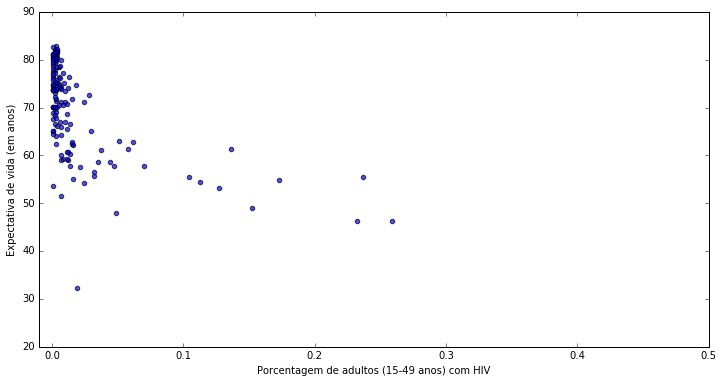

In [51]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(dados.HIVs/100, dados.ExpecV, alpha=0.7)
plt.xlabel("Porcentagem de adultos (15-49 anos) com HIV")
plt.ylabel("Expectativa de vida (em anos)")
plt.xlim(-0.01,0.5)
plt.show()

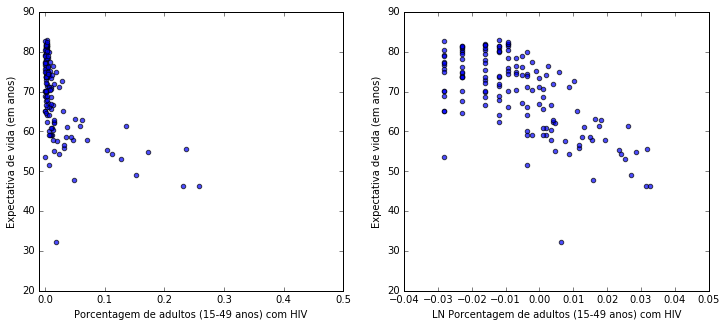

In [60]:
f, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(dados.HIVs/100, dados.ExpecV, alpha=0.7)
ax[0].set_xlabel("Porcentagem de adultos (15-49 anos) com HIV")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_xlim(-0.01,0.5)

ax[1].scatter(dados.LNHIVs/100, dados.ExpecV, alpha=0.7)
ax[1].set_xlabel("LN Porcentagem de adultos (15-49 anos) com HIV")
ax[1].set_ylabel("Expectativa de vida (em anos)")

plt.show()

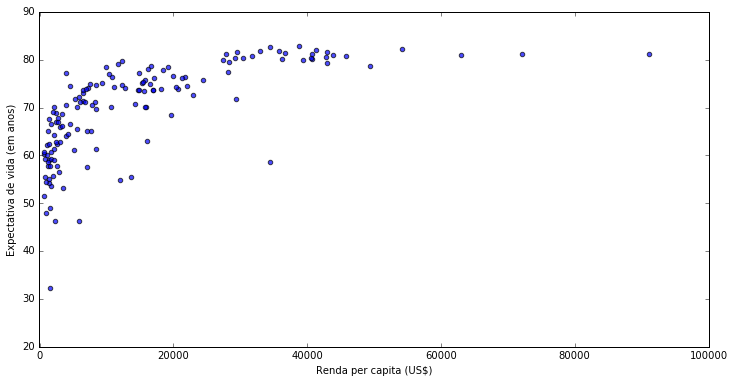

In [53]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(dados.PerCap, dados.ExpecV, alpha=0.7) 
plt.xlabel("Renda per capita (US$)")
plt.ylabel("Expectativa de vida (em anos)")
plt.xlim(-100,100000)
plt.show()

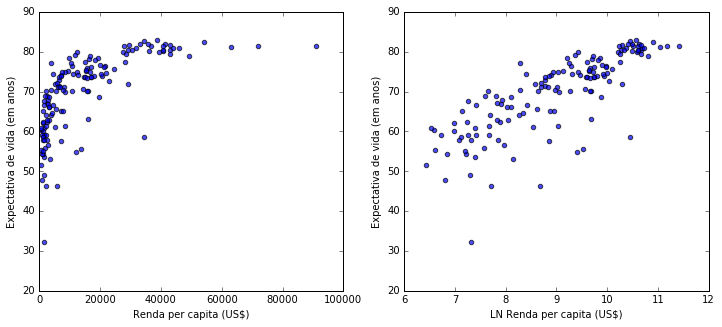

In [61]:
f, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(dados.PerCap, dados.ExpecV, alpha=0.7)
ax[0].set_xlabel("Renda per capita (US$)")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_xlim(-100,100000)

ax[1].scatter(dados.LNPerCap, dados.ExpecV, alpha=0.7)
ax[1].set_xlabel("LN Renda per capita (US$)")
ax[1].set_ylabel("Expectativa de vida (em anos)")

plt.show()

In [55]:
dados.corr(method='pearson')

,ExpecV,HIVs,PerCap,LNHIVs,LNPerCap
ExpecV,1.000000,-0.569999,0.666039,-0.667621,0.793654
HIVs,-0.569999,1.000000,-0.213327,0.739172,-0.231174
PerCap,0.666039,-0.213327,1.000000,-0.351454,0.855467
LNHIVs,-0.667621,0.739172,-0.351454,1.000000,-0.442993
LNPerCap,0.793654,-0.231174,0.855467,-0.442993,1.000000


In [62]:
model = sm.ols(formula='ExpecV ~ LNHIVs + LNPerCap', data = dados)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 ExpecV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     216.3
Date:                Tue, 29 Nov 2016   Prob (F-statistic):           1.10e-43
Time:                        15:51:42   Log-Likelihood:                -430.03
No. Observations:                 144   AIC:                             866.1
Df Residuals:                     141   BIC:                             875.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.7030      3.207      7.703      0.0

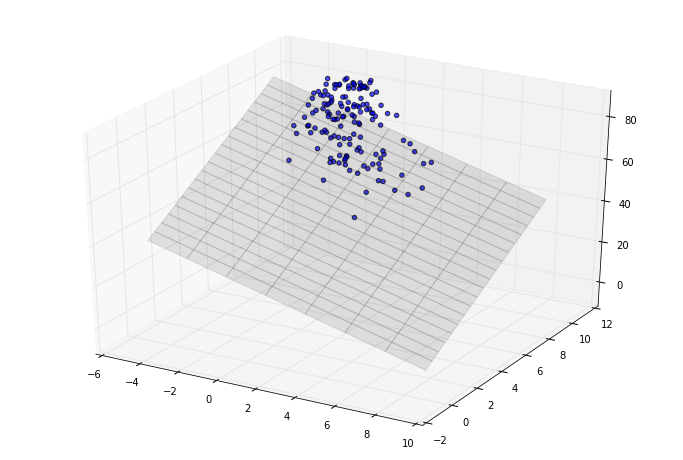

In [105]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-5, 10, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'LNHIVs': x_surf.ravel(), 'LNPerCap': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['LNHIVs'], dados['LNPerCap'], dados['ExpecV'],
           c='blue',
           marker='o',
           alpha=0.7)


plt.show()

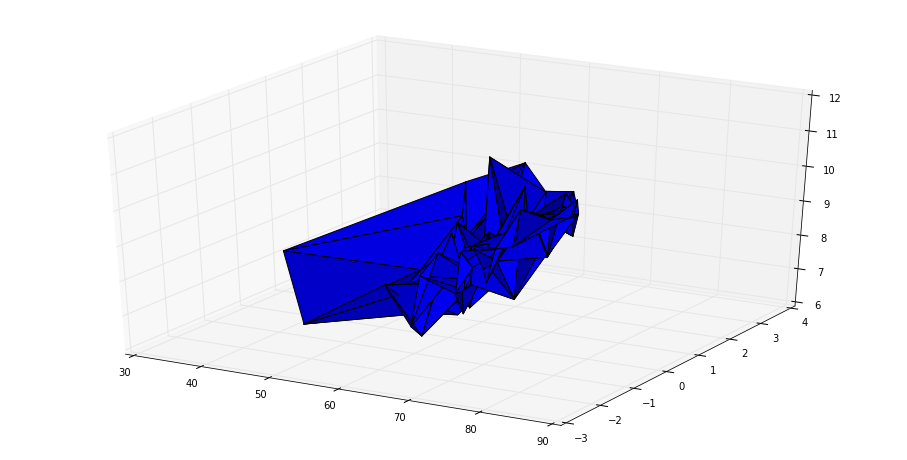

In [120]:
import mpl_toolkits.mplot3d.axes3d as p3


fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_trisurf(dados.ExpecV, dados.LNHIVs, dados.LNPerCap)
plt.show()

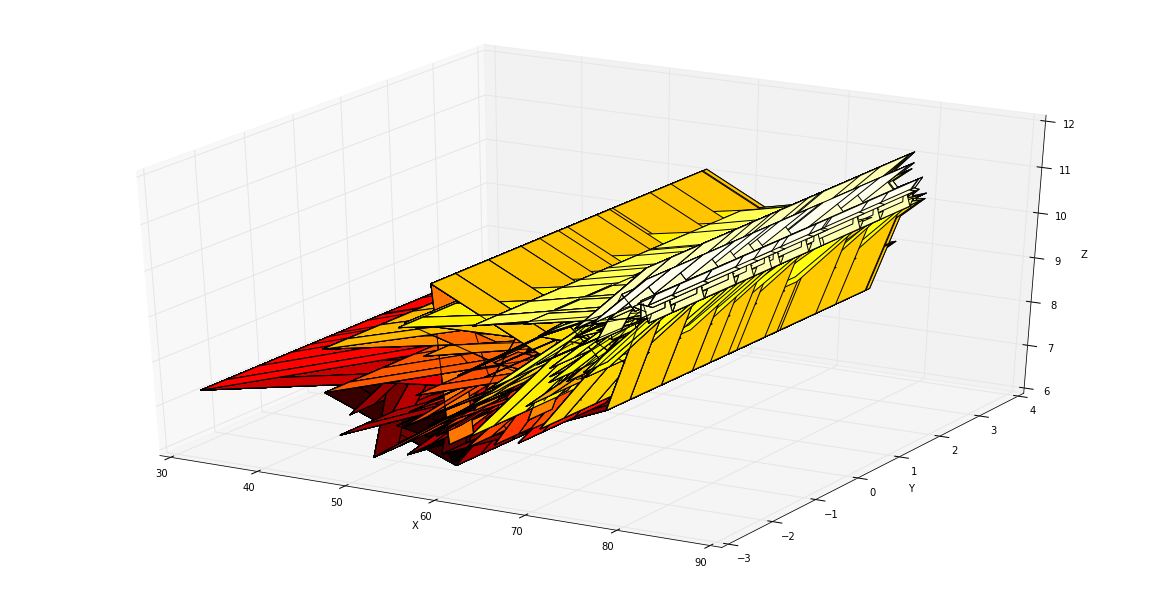

In [101]:
fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
X = dados.ExpecV
Y = dados.LNHIVs
X, Y = np.meshgrid(X, Y)
Z = dados.LNPerCap
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

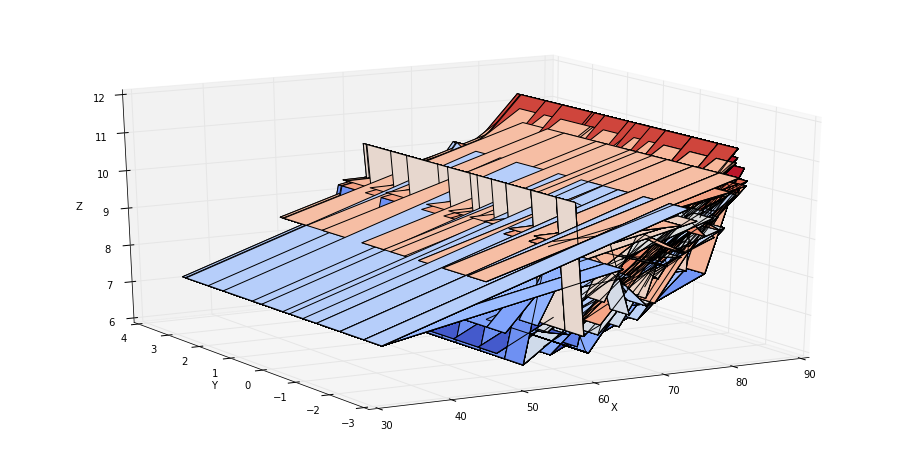

In [115]:
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

##############################################################################
# Generate and show the data
x = dados.ExpecV
y = dados.LNHIVs

X, Y = np.meshgrid(x, y)

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = dados.LNPerCap

# Plot the data
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()

In [111]:
y=dados.ExpecV
X=dados.iloc[:,]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 ExpecV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.931e+26
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        16:39:55   Log-Likelihood:                 3587.9
No. Observations:                 144   AIC:                            -7164.
Df Residuals:                     138   BIC:                            -7146.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -7.525e-12   4.36e-12     -1.724      0.0

In [110]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(142.76807369762739,
 1.5083870276466447e-20,
 712.72417152664457,
 4.3783097803583433e-117)